# pca window experiment
generate random matrices with areas of concentrated differences. apply pca and generate heatmap to visualize what areas can pick up changes.

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os

## define functions

In [2]:
def collect_windows(matrix, window_size):
    """ Extracts all sliding windows from the matrix for PCA. """
    m, n = matrix.shape
    windows = []

    for i in range(0, m - window_size + 1):
        for j in range(0, n - window_size + 1):
            window = matrix[i:i+window_size, j:j+window_size].flatten()
            windows.append(window)  # Collect all windows

    return np.array(windows)

def apply_pca(matrix, window_size, n_components=1):
    """
    Apply PCA to all windows in the matrix together, returning transformed features.
    """
    windows = collect_windows(matrix, window_size)  # Collect windows

    pca = PCA(n_components=n_components)
    transformed_windows = pca.fit_transform(windows)  # Apply PCA on all windows

    return transformed_windows.reshape(matrix.shape[0] - window_size + 1, 
                                       matrix.shape[1] - window_size + 1)

## perform computations on matrices
generate 2 matrices with similar data and some areas of clustered differences. apply pca to both of these.

In [3]:
# Initialize matrix1 with structured random values
np.random.seed(42)
matrix1 = np.random.rand(100, 100) * 100  # Base matrix with random values, scaled by 100 to make bigger

# Create matrix2 by adding small noise and larger noise in clusters
small_noise = np.random.normal(0, 5, matrix1.shape)  # Small random noise
matrix2 = matrix1 + small_noise  # Start by adding small noise everywhere
matrix2_small_noise = matrix2.copy()

# Introduce clusters with larger noise
num_clusters = 3
cluster_size = 3  # Size of each noise cluster
large_noise_std = 20  # Higher noise level

for _ in range(num_clusters):
    x, y = np.random.randint(0, matrix1.shape[0] - cluster_size), np.random.randint(0, matrix1.shape[1] - cluster_size)
    matrix2[x:x+cluster_size, y:y+cluster_size] += np.random.normal(0, large_noise_std, (cluster_size, cluster_size))

# Set window size
window_size = 10

# Apply PCA
pca_matrix1 = apply_pca(matrix1, window_size)
pca_matrix2 = apply_pca(matrix2, window_size)

# Compute PCA difference matrix
diff_matrix = pca_matrix1 - pca_matrix2
diff_matrix1 = pca_matrix2 - pca_matrix1

## generate plots

plot saved to out/matrix_pca.png


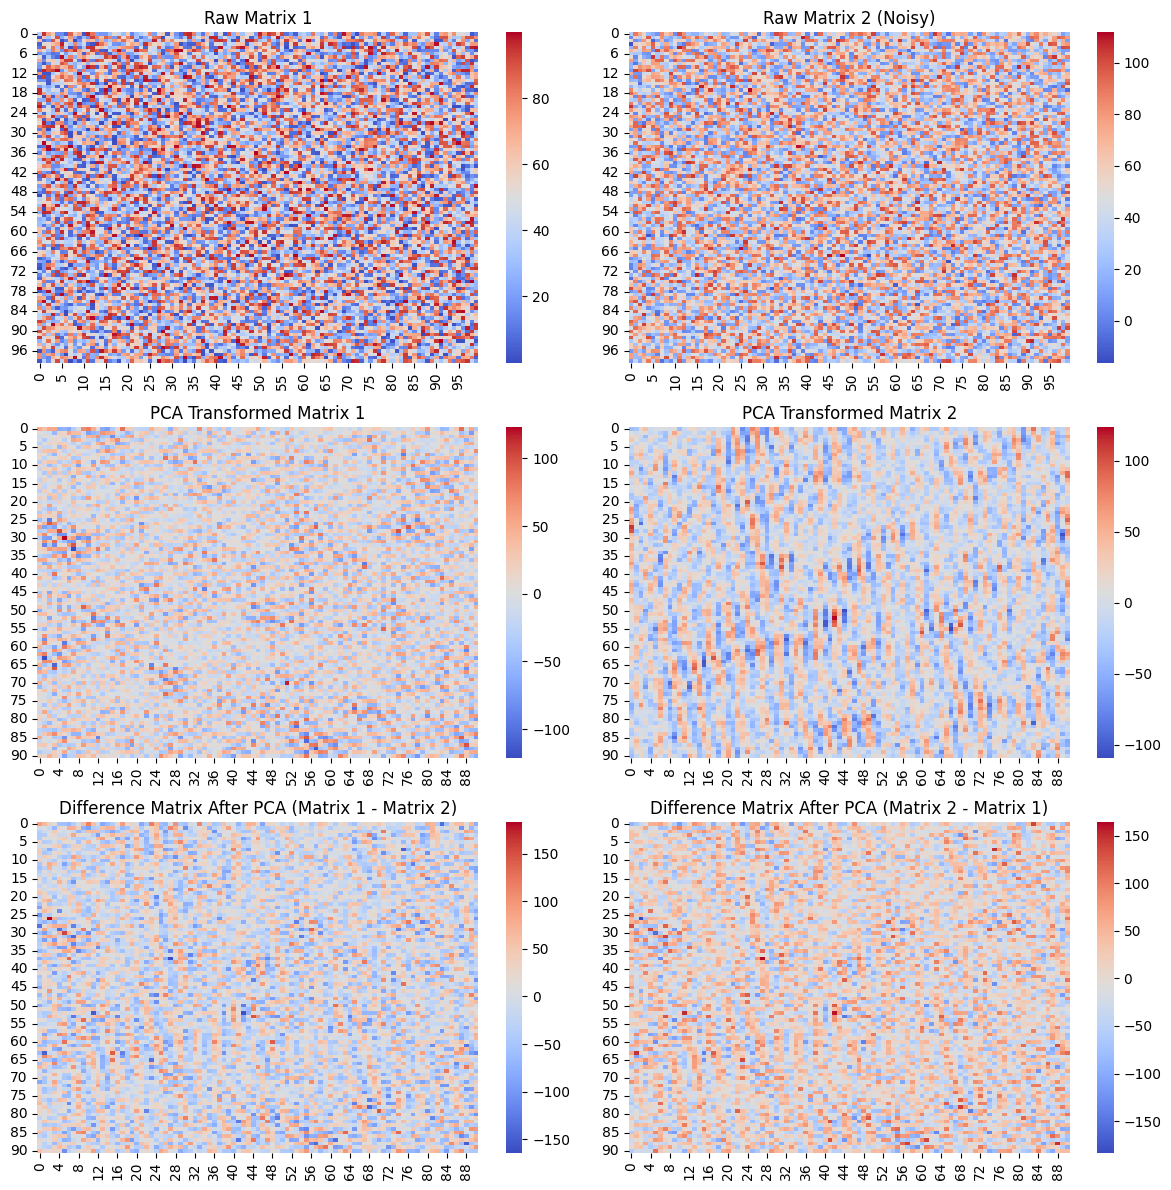

In [4]:
# Plot heatmaps in a grid layout
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# First row: Raw matrices
sns.heatmap(matrix1, cmap="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title("Raw Matrix 1")

sns.heatmap(matrix2, cmap="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Raw Matrix 2 (Noisy)")

# Second row: PCA transformed matrices
sns.heatmap(pca_matrix1, cmap="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("PCA Transformed Matrix 1")

sns.heatmap(pca_matrix2, cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("PCA Transformed Matrix 2")

# Third row: Difference matrix spanning two columns
sns.heatmap(diff_matrix, cmap="coolwarm", ax=axes[2, 0], cbar=True)
axes[2, 0].set_title("Difference Matrix After PCA (Matrix 1 - Matrix 2)")

sns.heatmap(diff_matrix1, cmap="coolwarm", ax=axes[2, 1], cbar=True)
axes[2, 1].set_title("Difference Matrix After PCA (Matrix 2 - Matrix 1)")  # Hide the second subplot in the third row

# Adjust layout
plt.tight_layout()

# save to out dir
save_path = os.path.join("out", "matrix_pca.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # High resolution and tight layout
print(f"plot saved to {save_path}")